# HR Analytics: Job Change of Data Scientists

### Data Science project from Kaggle: 
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

#### 
### Task description


A Company wants to know which of its candidates of data scientists are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.


This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials, demographics, experience data we will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

#### 

### Load dataset

In [1]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
data = pd.read_csv('dataset/aug_train.csv')

In [3]:
# check the dataset
data.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [4]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
# feature ID is not useful for the model,we drop it
data.drop('enrollee_id',axis=1,inplace=True)

### Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change
#### 

### Seperate dataset into train and test data

In [7]:
# split these datasets into normal train data and test data
from sklearn.model_selection import train_test_split

X = data.drop(labels='target',axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_train.shape, X_test.shape

((15326, 12), (3832, 12))

#### 
### Data cleaning and feature engineering

### Handle Missing value

In [8]:
# check some basic information

def unqiue_element(x):
    a = len(np.unique(x))
    return a

df_eda = pd.DataFrame(
    [X_train.dtypes, X_train.astype(str).apply(unqiue_element), 
    X_train.isnull().sum()/X_train.shape[0]]
    ).T

df_eda.columns = ['Data Type', 'Unique Value', 'Percentage of NA']
df_eda

,Data Type,Unique Value,Percentage of NA
city,object,123,0
city_development_index,float64,93,0
gender,object,4,0.234503
relevent_experience,object,2,0
enrolled_university,object,4,0.0197703
education_level,object,6,0.0242072
major_discipline,object,7,0.146092
experience,object,23,0.00345818
company_size,object,9,0.310388
company_type,object,7,0.32024


In [9]:
# number of columns with missing values
sum(data.isnull().sum()>0)

8

In [10]:
# number of missing values in each columns
data.isnull().sum().sort_values(ascending=False)/len(data)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
target                    0.000000
training_hours            0.000000
relevent_experience       0.000000
city_development_index    0.000000
city                      0.000000
dtype: float64

<AxesSubplot:>

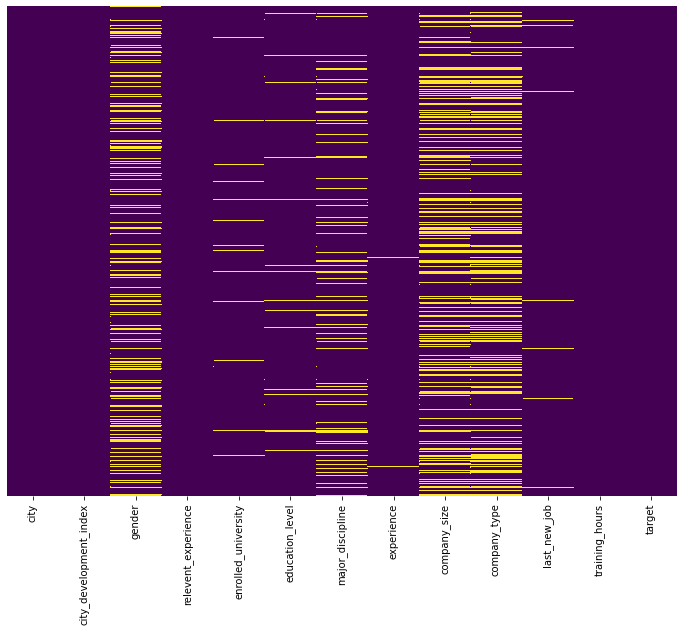

In [11]:
# plot the missing value using heatmap
plt.figure(figsize=(12,9))

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# check all unique values of each feature
for i in data.columns:
    print(i, data[i].unique(),'\n')

city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

#### For features with no more than 5% missing value, we use frequent category imputation
#### For those features with a big number of missing value, we should not ignore this information.

In [13]:
# impute the missing data less than 5 percent
from feature_engine.imputation import CategoricalImputer

imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=['education_level','last_new_job','enrolled_university','experience']
)

imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['education_level', 'last_new_job',
                              'enrolled_university', 'experience'])

In [14]:
# the values that will be used to replace NA for each variable
imputer.imputer_dict_

{'education_level': 'Graduate',
 'last_new_job': '1',
 'enrolled_university': 'no_enrollment',
 'experience': '>20'}

In [15]:
# transform the train and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [16]:
# check features again,there is no missing value in these two columns now
X_train.isnull().sum().sort_values()

city                         0
city_development_index       0
relevent_experience          0
enrolled_university          0
education_level              0
experience                   0
last_new_job                 0
training_hours               0
major_discipline          2239
gender                    3594
company_size              4757
company_type              4908
dtype: int64

In [17]:
# encode features with big number of missing values
from feature_engine.imputation import AddMissingIndicator

imputer_add = AddMissingIndicator(missing_only=True)
imputer_add.fit(X_train)

AddMissingIndicator()

In [18]:
# show the features with missing values
imputer_add.variables_

['gender', 'major_discipline', 'company_size', 'company_type']

In [19]:
# transform the datasets
X_train = imputer_add.transform(X_train)
X_test = imputer_add.transform(X_test)

In [20]:
# impute the missing value with frequent categories
imputer_cat = CategoricalImputer(
    imputation_method='frequent',
    variables=['major_discipline','gender','company_size','company_type']
)

imputer_cat.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['major_discipline', 'gender', 'company_size',
                              'company_type'])

In [21]:
imputer_cat.imputer_dict_

{'major_discipline': 'STEM',
 'gender': 'Male',
 'company_size': '50-99',
 'company_type': 'Pvt Ltd'}

In [22]:
# transform the datasets
X_train = imputer_cat.transform(X_train)
X_test = imputer_cat.transform(X_test)

In [23]:
# check the missing data again
X_train.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
gender_na                 0
major_discipline_na       0
company_size_na           0
company_type_na           0
dtype: int64

### Categorical encoding

In [24]:
# check the data type of each columns
for col in X_train.columns:
    print(col,": ",X_train[col].dtype)

# make list of variables types

# numerical: discrete and continuous
discrete = [var for var in X_train.columns if X_train[var].dtype!='O'and X_train[var].nunique()<10]
continuous = [var for var in X_train.columns if X_train[var].dtype!='O'and var not in discrete]

# categorical
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('\nThere are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

city :  object
city_development_index :  float64
gender :  object
relevent_experience :  object
enrolled_university :  object
education_level :  object
major_discipline :  object
experience :  object
company_size :  object
company_type :  object
last_new_job :  object
training_hours :  int64
gender_na :  int32
major_discipline_na :  int32
company_size_na :  int32
company_type_na :  int32

There are 4 discrete variables
There are 2 continuous variables
There are 10 categorical variables


['city_development_index', 'training_hours']


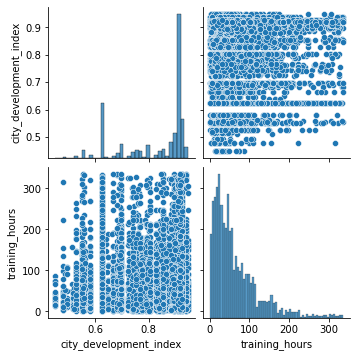

In [25]:
# plot all continuous variable
print(continuous)
sns.pairplot(data=X_train[continuous])

In [26]:
# In this section we handle object data
categorical

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [27]:
X_train[categorical].nunique()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64

In [28]:
# check the feature city with high cardinality
X_train['city'].unique()

array(['city_103', 'city_160', 'city_11', 'city_21', 'city_173',
       'city_16', 'city_114', 'city_1', 'city_75', 'city_64', 'city_67',
       'city_69', 'city_91', 'city_13', 'city_50', 'city_136', 'city_19',
       'city_128', 'city_20', 'city_89', 'city_100', 'city_157',
       'city_65', 'city_104', 'city_98', 'city_97', 'city_159',
       'city_138', 'city_61', 'city_71', 'city_41', 'city_105', 'city_33',
       'city_102', 'city_117', 'city_123', 'city_27', 'city_73',
       'city_40', 'city_28', 'city_152', 'city_36', 'city_134', 'city_83',
       'city_55', 'city_84', 'city_77', 'city_57', 'city_142', 'city_150',
       'city_70', 'city_74', 'city_44', 'city_101', 'city_116', 'city_90',
       'city_10', 'city_23', 'city_99', 'city_165', 'city_46', 'city_126',
       'city_45', 'city_9', 'city_30', 'city_158', 'city_176', 'city_62',
       'city_127', 'city_14', 'city_162', 'city_72', 'city_76', 'city_7',
       'city_149', 'city_118', 'city_141', 'city_24', 'city_144',
     

In [29]:
# encode this column into numerical variables
X_train['city'] = X_train['city'].str.split(pat='_').apply(lambda x:x[-1])
X_test['city'] = X_test['city'].str.split(pat='_').apply(lambda x:x[-1])

X_train['city'].head(),X_test['city'].head()

(12737    103
 196      160
 12669     11
 9890      21
 1759      21
 Name: city, dtype: object,
 11335    162
 9504      78
 4722     100
 7737      89
 15569     21
 Name: city, dtype: object)

In [30]:
X_train['city'].unique()

array(['103', '160', '11', '21', '173', '16', '114', '1', '75', '64',
       '67', '69', '91', '13', '50', '136', '19', '128', '20', '89',
       '100', '157', '65', '104', '98', '97', '159', '138', '61', '71',
       '41', '105', '33', '102', '117', '123', '27', '73', '40', '28',
       '152', '36', '134', '83', '55', '84', '77', '57', '142', '150',
       '70', '74', '44', '101', '116', '90', '10', '23', '99', '165',
       '46', '126', '45', '9', '30', '158', '176', '62', '127', '14',
       '162', '72', '76', '7', '149', '118', '141', '24', '144', '81',
       '78', '106', '8', '143', '111', '37', '26', '80', '48', '54', '59',
       '175', '115', '93', '120', '39', '167', '145', '53', '146', '43',
       '94', '25', '155', '12', '180', '18', '107', '139', '131', '109',
       '133', '79', '42', '179', '31', '82', '2', '129', '166', '171',
       '140', '121'], dtype=object)

In [31]:
X_train['city'].value_counts().head(20)

103    3523
21     2158
16     1237
114    1047
160     650
136     472
67      346
102     247
104     240
75      240
73      222
100     222
71      213
11      185
61      167
90      163
28      151
23      146
65      142
36      128
Name: city, dtype: int64

In [32]:
# apply frequent onehot encoding to reduce the number of cities
from feature_engine.encoding import OneHotEncoder

ohe_city = OneHotEncoder(
    top_categories=5,
    variables=['city'],
    drop_last=True)  # to return k-1

ohe_city.fit(X_train)

X_train = ohe_city.transform(X_train)
X_test = ohe_city.transform(X_test)

In [33]:
# show the feature experience
X_train['experience'].value_counts()

>20    2638
5      1163
4      1133
3      1072
6       978
2       904
7       833
10      790
9       784
8       654
15      553
11      541
14      461
1       439
<1      420
16      411
12      393
13      313
17      277
19      235
18      214
20      120
Name: experience, dtype: int64

<AxesSubplot:xlabel='experience', ylabel='Count'>

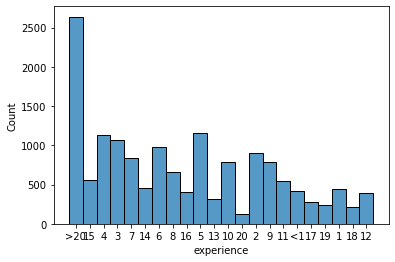

In [34]:
sns.histplot(X_train['experience'])

In [35]:
# reduce the categories in this feature
def cat_reduce(data,col):
    data[col].replace(['>20','20'],'over 20 years',inplace=True)
    data[col].replace(['19','18','17','16','15','14','13','12','11','10'],'10-20 years',inplace=True)
    data[col].replace(['5','6','7','8','9'],'over 5 years',inplace=True)         
    data[col].replace(['<1','1','2','3','4'],'less than 5 years',inplace=True)

In [36]:
cat_reduce(X_train,'experience')
cat_reduce(X_test,'experience')

In [37]:
X_train['experience'].value_counts()

over 5 years         4412
10-20 years          4188
less than 5 years    3968
over 20 years        2758
Name: experience, dtype: int64

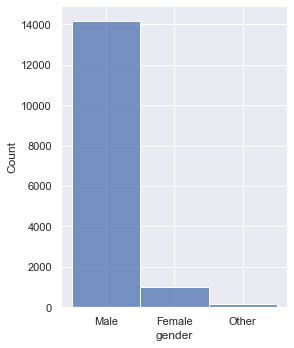

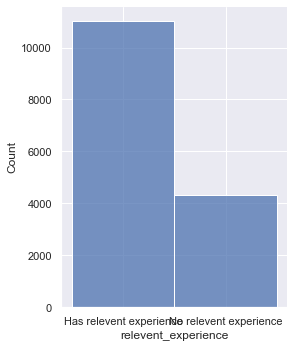

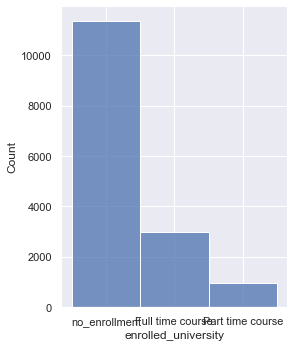

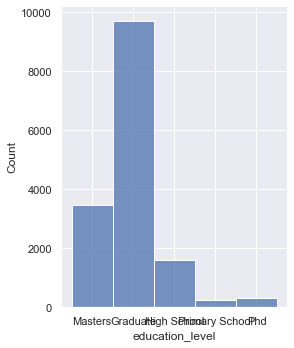

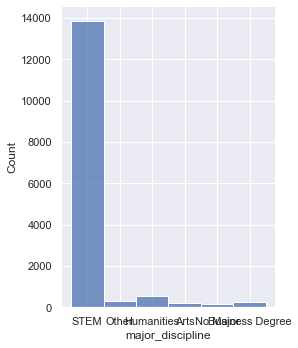

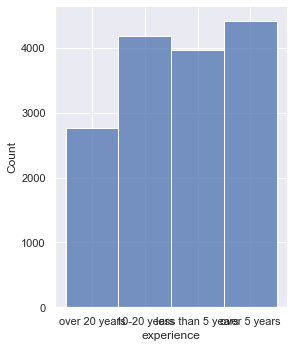

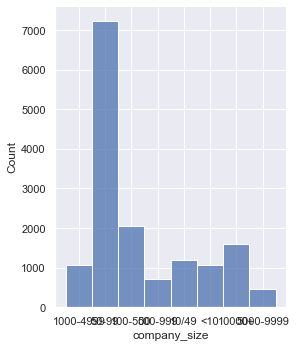

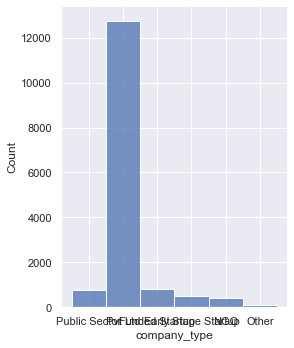

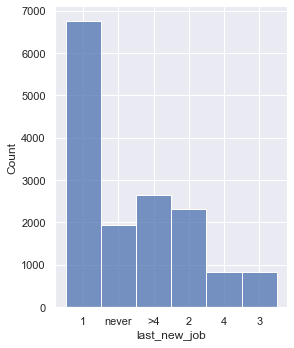

In [38]:
categorical.remove('city')
sns.set(style="darkgrid")
for col in categorical:
    sns.displot(x=X_train[col],aspect=0.85)

In [39]:
# first we transform feature relevent_experience into binary variables
X_train.replace({'Has relevent experience':1, 'No relevent experience':0},inplace=True)
X_test.replace({'Has relevent experience':1, 'No relevent experience':0},inplace=True)

In [40]:
X_train['company_size'].value_counts()

50-99        7228
100-500      2041
10000+       1587
10/49        1183
<10          1062
1000-4999    1062
500-999       710
5000-9999     453
Name: company_size, dtype: int64

In [41]:
# encode feature last_new_job, we need numerical variables
X_train['last_new_job'].replace('never','0',inplace=True)
X_train['last_new_job'].replace('>4','5',inplace=True)

X_test['last_new_job'].replace('never','0',inplace=True)
X_test['last_new_job'].replace('>4','5',inplace=True)

X_train['last_new_job'] = X_train['last_new_job'].apply(pd.to_numeric)
X_test['last_new_job'] = X_test['last_new_job'].apply(pd.to_numeric)

In [42]:
# encode feature company_size into four categories and reduce the cardinality
def size_reduce(dataset,col):
    dataset[col].replace(['10000+','5000-9999'],'very large',inplace=True)
    dataset[col].replace(['1000-4999','500-999'],'large',inplace=True)
    dataset[col].replace(['100-500','50-99'],'medium',inplace=True)
    dataset[col].replace(['10/49','<10'],'small',inplace=True)

In [43]:
size_reduce(X_train,'company_size')
size_reduce(X_test,'company_size')

In [44]:
# for categorical variables we use onehotencoder
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['experience','gender', 'company_size','enrolled_university','education_level','major_discipline','company_type'],
    drop_last=True)  # to return k-1

ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True,
              variables=['experience', 'gender', 'company_size',
                         'enrolled_university', 'education_level',
                         'major_discipline', 'company_type'])

In [45]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [46]:
ohe_enc.variables

['experience',
 'gender',
 'company_size',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type']

#### 
### Outlier Engineering

In [47]:
# show all int and float values
X_train.select_dtypes(['int','float']).columns

Index(['city_development_index', 'gender_na', 'major_discipline_na',
       'company_size_na', 'company_type_na', 'city_103', 'city_21', 'city_16',
       'city_114', 'city_160', 'experience_over 20 years',
       'experience_10-20 years', 'experience_less than 5 years', 'gender_Male',
       'gender_Female', 'company_size_large', 'company_size_medium',
       'company_size_small', 'enrolled_university_no_enrollment',
       'enrolled_university_Full time course', 'education_level_Masters',
       'education_level_Graduate', 'education_level_High School',
       'education_level_Primary School', 'major_discipline_STEM',
       'major_discipline_Other', 'major_discipline_Humanities',
       'major_discipline_Arts', 'major_discipline_No Major',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Funded Startup', 'company_type_Early Stage Startup',
       'company_type_NGO'],
      dtype='object')

<AxesSubplot:xlabel='city_development_index'>

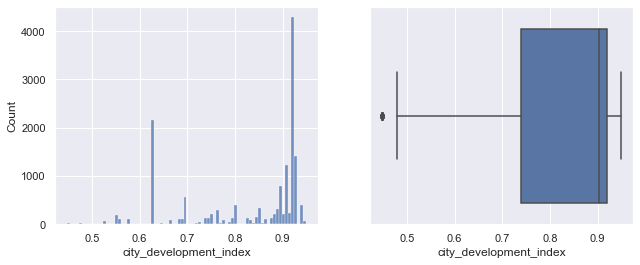

In [48]:
# show the distribution of each continuous features
plt.figure(figsize=(16, 4))    

plt.subplot(1, 3, 1)
sns.histplot(x='city_development_index',data=X_train,bins=80)

plt.subplot(1, 3, 2)    
sns.boxplot(x='city_development_index',data=X_train)

In [49]:
# import library to handle the outliers
from feature_engine.outliers import ArbitraryOutlierCapper

capper = ArbitraryOutlierCapper(max_capping_dict=None,min_capping_dict={'city_development_index':0.5})
capper.fit(X_train)

ArbitraryOutlierCapper(min_capping_dict={'city_development_index': 0.5})

In [50]:
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)

#### 
### Feature Selection with feature engine

In [51]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features) # there are no constant features

[]


In [52]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [53]:
# print the number of quasi-constant features
quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant)

0

In [54]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30


0

In [55]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

correlated features:  1


((15326, 36), (3832, 36))

#### 
### Data preprocessing

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 
### Model building

In [57]:
# import machine learning algorithm model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
# train the model
KNN = KNeighborsClassifier(n_neighbors=7)
rfc = RandomForestClassifier(n_estimators=200)
LR = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC(C=10,gamma=0.01)

In [59]:
model_list = [rfc,LR,dtree,svm,KNN]

In [60]:
# evaluate the algorithm we just build
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

for model in model_list:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(model)
    print(confusion_matrix(y_test,pred),'\n')
    print(classification_report(y_test,pred))
    print(roc_auc_score(y_test,pred),'\n')

RandomForestClassifier(n_estimators=200)
[[2540  328]
 [ 511  453]] 

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2868
         1.0       0.58      0.47      0.52       964

    accuracy                           0.78      3832
   macro avg       0.71      0.68      0.69      3832
weighted avg       0.77      0.78      0.77      3832

0.6777758005057959 

LogisticRegression()
[[2656  212]
 [ 633  331]] 

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      2868
         1.0       0.61      0.34      0.44       964

    accuracy                           0.78      3832
   macro avg       0.71      0.63      0.65      3832
weighted avg       0.76      0.78      0.76      3832

0.6347209442293559 

DecisionTreeClassifier()
[[2287  581]
 [ 520  444]] 

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      2868
         1.0       0.